### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
axis_dataset=pd.read_csv('nifty_vs_axis_nav.csv')
axis_dataset

,Nifty 50 Change,Net Asset Value Change in ₹
0,0.00,0.00
1,0.00,0.00
2,271.65,1.19
3,179.55,0.86
4,120.60,0.56
...,...,...
312,-45.80,-0.30
313,-128.80,-0.87
314,321.50,0.95
315,0.00,0.00


#### How big is the dataset? (Rows and columns)

In [3]:
axis_dataset.shape

(317, 2)

In [4]:
axis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nifty 50 Change              317 non-null    float64
 1   Net Asset Value Change in ₹  317 non-null    float64
dtypes: float64(2)
memory usage: 5.1 KB


#### Data Pre-processing: Finding out NaN values

In [5]:
axis_dataset.isna().any()

Nifty 50 Change                False
Net Asset Value Change in ₹    False
dtype: bool

#### Rename specific columns

In [6]:
axis_dataset.rename(columns = {'Nifty 50 Change':'nifty_50_change','Net Asset Value Change in ₹':'axis_nav_changes'},inplace = True)

In [7]:
axis_dataset

,nifty_50_change,axis_nav_changes
0,0.00,0.00
1,0.00,0.00
2,271.65,1.19
3,179.55,0.86
4,120.60,0.56
...,...,...
312,-45.80,-0.30
313,-128.80,-0.87
314,321.50,0.95
315,0.00,0.00


In [8]:
#having a glance at the first five records of the dataset
axis_dataset.head()

,nifty_50_change,axis_nav_changes
0,0.00,0.00
1,0.00,0.00
2,271.65,1.19
3,179.55,0.86
4,120.60,0.56


### Importing the ML Libraries

In [9]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [10]:
axis_dataset

,nifty_50_change,axis_nav_changes
0,0.00,0.00
1,0.00,0.00
2,271.65,1.19
3,179.55,0.86
4,120.60,0.56
...,...,...
312,-45.80,-0.30
313,-128.80,-0.87
314,321.50,0.95
315,0.00,0.00


In [11]:
axis_dataset.shape

(317, 2)

In [12]:
#Independent Variable
X=axis_dataset.iloc[:,:-1].values

#Dependent Variable
y=axis_dataset.iloc[:,-1].values

In [13]:
X

array([[   0.  ],
       [   0.  ],
       [ 271.65],
       [ 179.55],
       [ 120.6 ],
       [-179.38],
       [  66.8 ],
       [   0.  ],
       [   0.  ],
       [ 190.6 ],
       [  52.45],
       [ 156.6 ],
       [  45.45],
       [  -2.05],
       [   0.  ],
       [   0.  ],
       [  52.35],
       [-195.05],
       [-174.65],
       [-181.4 ],
       [-139.85],
       [   0.  ],
       [   0.  ],
       [-468.05],
       [ 128.85],
       [   0.  ],
       [-167.8 ],
       [  -8.2 ],
       [   0.  ],
       [   0.  ],
       [ 237.9 ],
       [ 237.  ],
       [ 203.15],
       [-219.8 ],
       [ -43.9 ],
       [   0.  ],
       [   0.  ],
       [-302.7 ],
       [  53.15],
       [ 197.05],
       [ 142.05],
       [-231.1 ],
       [   0.  ],
       [   0.  ],
       [-531.95],
       [ 509.95],
       [ -30.25],
       [ -17.6 ],
       [ -28.3 ],
       [   0.  ],
       [   0.  ],
       [ -69.65],
       [-114.45],
       [ -28.95],
       [-815.3 ],
       [ 4

In [14]:
y

array([ 0.    ,  0.    ,  1.19  ,  0.86  ,  0.56  , -0.34  ,  0.36  ,
        0.    ,  0.    , -0.16  ,  0.23  , -0.32  , -0.16  ,  0.27  ,
        0.    ,  0.    ,  0.37  , -1.09  , -1.16  , -0.62  , -1.48  ,
        0.    ,  0.    , -3.08  ,  0.03  ,  0.    , -1.39  ,  0.32  ,
        0.    ,  0.    ,  1.23  ,  1.01  ,  1.22  , -1.    ,  0.02  ,
        0.    ,  0.    , -1.6   , -0.25  ,  0.85  ,  0.44  , -1.51  ,
        0.    ,  0.    , -1.92  ,  1.92  , -0.16  , -0.04  , -0.64  ,
        0.    ,  0.    , -0.28  , -0.26  ,  0.15  , -3.45  ,  2.56  ,
        0.    ,  0.    ,  0.56  ,  0.    , -0.67  , -0.51  , -1.62  ,
        0.    ,  0.    , -1.96  ,  0.89  ,  1.13  ,  1.26  ,  0.12  ,
        0.    ,  0.    ,  0.4   , -0.34  ,  1.17  ,  1.36  ,  0.    ,
        0.    ,  0.    , -0.9   ,  0.39  , -0.17  , -0.36  , -0.35  ,
        0.    ,  0.    , -0.17  ,  0.5   ,  1.    , -0.16  ,  0.86  ,
        0.    ,  0.    ,  1.38  ,  0.12  , -0.58  , -0.5   ,  0.72  ,
        0.    ,  0. 

### Splitting the dataset (Training and Testing)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size=1/3, random_state=0)

In [16]:
X_train

array([[  49.85],
       [   0.  ],
       [ -14.75],
       [   5.4 ],
       [   0.  ],
       [ -54.65],
       [   0.  ],
       [   0.  ],
       [-331.55],
       [   0.  ],
       [   0.  ],
       [  -4.6 ],
       [   0.  ],
       [   0.  ],
       [-531.95],
       [  36.45],
       [ -60.1 ],
       [   0.  ],
       [ -19.  ],
       [ 127.6 ],
       [-220.65],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [-174.65],
       [   0.  ],
       [-169.45],
       [   0.  ],
       [ 229.3 ],
       [   0.  ],
       [ 133.2 ],
       [ -51.45],
       [-207.  ],
       [ -69.75],
       [ -82.5 ],
       [-142.5 ],
       [   0.  ],
       [ 154.45],
       [ 258.55],
       [  52.35],
       [ 311.7 ],
       [ 177.9 ],
       [ 181.8 ],
       [-226.5 ],
       [ 456.75],
       [ 120.6 ],
       [-168.1 ],
       [   0.  ],
       [-107.9 ],
       [ 331.9 ],
       [   0.  ],
       [-276.3 ],
       [ 119.  ],
       [   0.  ],
       [   0.  ],
       [ 1

### Training the Simple Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Prediction of Testing dataset

In [18]:
y_pred=reg.predict(X_test)

In [19]:
y_pred

array([-3.65850743e-02,  6.73411828e-01,  1.63487021e+00,  5.07874838e-01,
       -3.65850743e-02, -3.21031783e-01, -6.97918581e-01, -1.60202085e-02,
       -3.65850743e-02, -3.65850743e-02, -2.44677083e-01,  4.77943796e-01,
       -3.65850743e-02, -3.65850743e-02, -3.65850743e-02,  8.94535038e-01,
       -2.08841277e-01,  7.05786220e-01, -2.14542428e-01,  1.23538242e+00,
       -7.19908735e-01,  4.76518508e-01,  6.97641719e-01, -1.12693019e+00,
       -6.16294159e-02,  3.82856743e-01, -3.65850743e-02, -3.65850743e-02,
       -8.01964585e-01, -1.30325864e+00, -3.65850743e-02, -3.65850743e-02,
        1.13887008e+00, -5.02654162e-01,  1.48498718e-01,  3.20551308e-01,
        5.53076821e-01, -3.39560523e-01,  5.47172057e-01, -3.97182870e-01,
       -1.06424173e-01, -1.59299928e+00, -3.65850743e-02,  1.94107925e-01,
        3.35618636e-01,  1.66154345e+00,  2.71214452e-03, -3.65850743e-02,
        2.16098079e-01, -3.65850743e-02, -6.60453875e-01,  7.51982062e-02,
       -3.65850743e-02, -

### Visualising the results

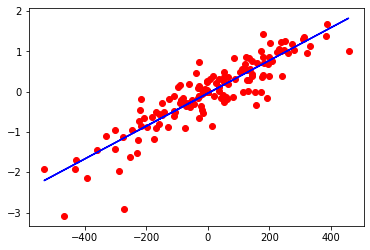

In [20]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

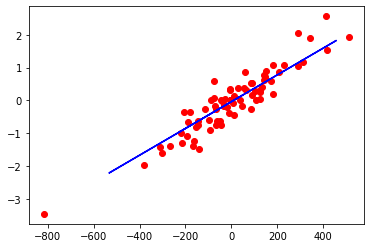

In [21]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')

In [22]:
#Coefficient
b=reg.coef_

In [23]:
b

array([0.00407225])

In [24]:
#Intercept
a=reg.intercept_

In [25]:
a

-0.036585074318204736

In [26]:
reg.predict([[100]])

array([0.37063999])

In [27]:
reg.predict([[-100]])

array([-0.44381014])